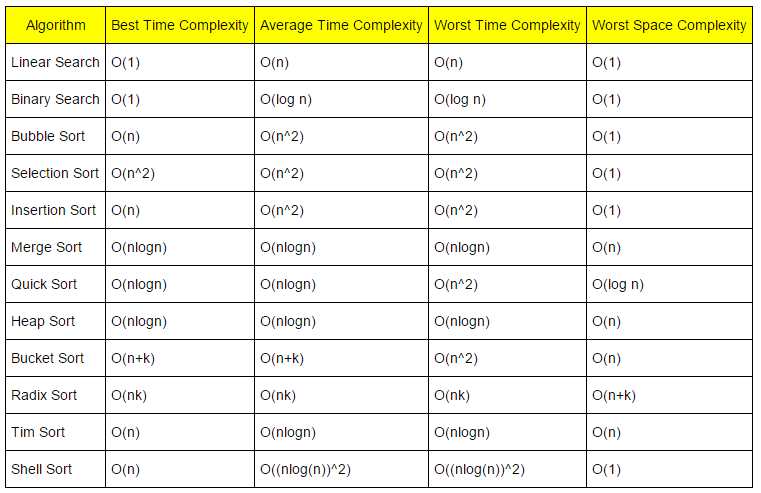

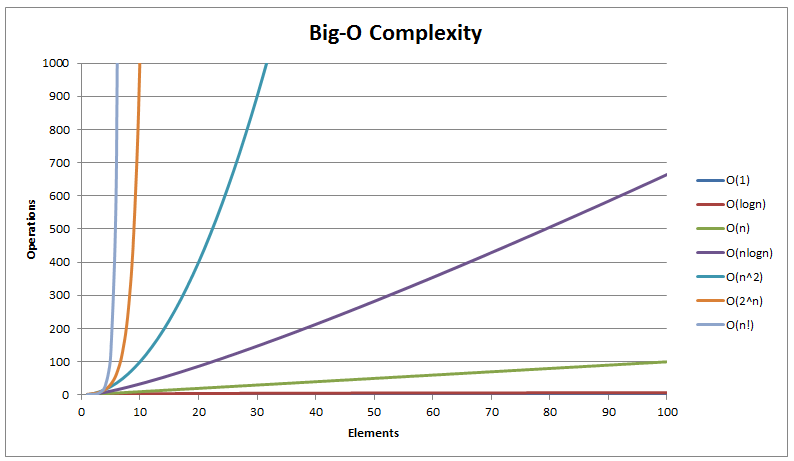

In [ ]:
# https://stackabuse.com/big-o-notation-and-algorithm-analysis-with-python-examples/

In [5]:
import random
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.linear_model import  LinearRegression
from sklearn import linear_model

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import math
import random
plt.rcParams['figure.figsize'] = [10, 6] # set size of plot

In [16]:
import os
import timeit
import numpy as np
import random
random.seed(42)

In [17]:
# https://www.kaggle.com/delayedkarma/understanding-time-complexity-via-python-examples
# Understanding Time Complexity via Python examples
from math import factorial

In [18]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

def timer(func, *args):
    wrapped = wrapper(func, *args)
    time = timeit.timeit(wrapped,number=10000)
    return("Time of execution is {} ms".format(time))

# 1. O(1) (Constant)

In [26]:
# Example from Ravi Ojha's post (see link above). 
# Adds 2 numbers
def O1_add(n1, n2):
    return (n1 + n2)

In [27]:
# No matter what the input, the function executes in one step, so roughly the same time complexity
for n in range(1,6):
    print(n,",",n + random.randint(1,int(1e10)))
    print(timer(O1_add, int(n), int(n) + random.randint(1,int(1e10))))
    print()

1 , 9443935787
Time of execution is 0.0026424999996379483 ms

2 , 5241752547
Time of execution is 0.002570099999957165 ms

3 , 3460967361
Time of execution is 0.0024157999996532453 ms

4 , 5756332155
Time of execution is 0.0025800999997045437 ms

5 , 1445662591
Time of execution is 0.002035299999988638 ms



In [28]:
# Checks whether a number is even or odd by checking last digit of binary representation
def O1_odd_check(num):
    is_odd = False
    if num & 1 == 1:
        is_odd = True
    return is_odd

In [29]:
check_lst = [1,5,8,82,101]
for num in check_lst:
    print(num,"::",O1_odd_check(num),"::",timer(O1_odd_check, num))

1 :: True :: Time of execution is 0.00542330000007496 ms
5 :: True :: Time of execution is 0.003927599999769882 ms
8 :: False :: Time of execution is 0.007330099999762751 ms
82 :: False :: Time of execution is 0.0038552000000890985 ms
101 :: True :: Time of execution is 0.002120599999670958 ms


# 2. O(n) (Linear)

* This is linear time complexity, so the running time increases, at most, with the size of the input n. Once again, this is very neatly explained in https://www.rookieslab.com/posts/how-to-compute-time-complexity-order-of-growth-of-any-program

In [30]:
# Finds an item in an unsorted list
def On_simple_search(lst,number):
    is_found = False
    for num in lst:
        if num == number:
            is_found = True
    return is_found

In [25]:
lst1 = range(5)
lst2 = range(500)
lst3 = range(50000)

num1 = 2
num2 = -50
num3 = 4000
print(On_simple_search(lst1,num1),"::",timer(On_simple_search,lst1,num1))
print(On_simple_search(lst2,num2),"::",timer(On_simple_search,lst2,num2))
print(On_simple_search(lst3,num3),"::",timer(On_simple_search,lst3,num3))

True :: Time of execution is 0.006716200000028039 ms
False :: Time of execution is 0.24237429999993765 ms
True :: Time of execution is 23.11489369999981 ms


# 3. O(log n) (Logarithmic)

* In this case, as is self-evident, the time complexity will go as the logarithm of the input size. For a very succinct explanation of why the order complexity in a Binary Search Tree is O(log n) see https://stackoverflow.com/questions/14426790/why-lookup-in-a-binary-search-tree-is-ologn. Here we will just illustrate a basic binary search.

In [31]:
def Ologn_binary_search(list,number):
    first = 0
    last = len(list) - 1
    is_found = False
    while first <= last and not is_found:
        mid = (first + last)//2
        if list[mid] == number:
            is_found = True
        else:
            if number < mid:
                last = mid - 1
            else:
                first = mid + 1

In [32]:
lst1 = range(5)
lst2 = range(500)
lst3 = range(50000)

num1 = 2
num2 = -50
num3 = 4000
print(Ologn_binary_search(lst1,num1),"::",timer(Ologn_binary_search,lst1,num1),"::","log value = {}".format(np.log2(len(lst1))))

None :: Time of execution is 0.011391600000024482 ms :: log value = 2.321928094887362


# 4. O(n log n) (Log-Linear)

* This will arise anytime we call an O(log n) algorithm inside a loop. A basic merge sort example is presented below. (https://stackoverflow.com/questions/18761766/mergesort-python)

In [34]:
def Onlogn_merge_sort(sequence):
    if len(sequence) < 2:
        return sequence
    
    m = len(sequence) // 2
    return Onlogn_merge(Onlogn_merge_sort(sequence[:m]), Onlogn_merge_sort(sequence[m:]))


def Onlogn_merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]

    return result

In [35]:
array = [4, 2, 3, 8, 8, 43, 6,1, 0]
ar = Onlogn_merge_sort(array)
print (" ".join(str(x) for x in ar))

0 1 2 3 4 6 8 8 43


In [36]:
lst1 = [4,2,3,8,8,43,6,1,0,83]
lst2 = []
for i in range(100):
    lst2.append(random.randint(0,i))

In [37]:
print("Sorted lst1:: ",Onlogn_merge_sort(lst1))
print(timer(Onlogn_merge_sort,lst1)," :: nlogn ~= {}".format(len(lst1)*np.log2(len(lst1))))

print("Sorted lst2:: ",Onlogn_merge_sort(lst2))
print(timer(Onlogn_merge_sort,lst2)," :: nlogn ~= {}".format(len(lst2)*np.log2(len(lst2))))

Sorted lst1::  [0, 1, 2, 3, 4, 6, 8, 8, 43, 83]
Time of execution is 0.16564359999983935 ms  :: nlogn ~= 33.219280948873624
Sorted lst2::  [0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 9, 10, 10, 10, 11, 11, 11, 12, 13, 13, 14, 14, 14, 14, 14, 15, 17, 17, 17, 17, 17, 18, 19, 20, 20, 20, 20, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 33, 34, 35, 40, 40, 43, 44, 46, 48, 49, 49, 49, 50, 51, 51, 52, 54, 54, 58, 58, 59, 60, 63, 63, 65, 67, 68, 71, 74, 74, 76, 76, 80, 87]
Time of execution is 2.569742600000154 ms  :: nlogn ~= 664.3856189774724


# 5. O ( n2 ) (Quadratic)

* Quadratic complexity is one general case of polynomial complexity (O( nc ) where c is some positive integer). We test out the runtime on a basic bubble sort algorithm.

In [38]:
def On2_bubble_sort(lst):
    for i in range(len(lst)-1):
        for j in range(len(lst)-1-i):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
    return lst

In [39]:
lst1 = [4,2,3,8,8,43,6,1,0,83]
lst2 = []
for i in range(100):
    lst2.append(random.randint(0,i))

In [40]:
print("Sorted lst1:: ",On2_bubble_sort(lst1))
print(timer(On2_bubble_sort,lst1)," :: n^2 ~= {}".format(len(lst1)**2))

print("Sorted lst2:: ",On2_bubble_sort(lst2))
print(timer(On2_bubble_sort,lst2)," :: n^2 ~= {}".format(len(lst2)**2))

Sorted lst1::  [0, 1, 2, 3, 4, 6, 8, 8, 43, 83]
Time of execution is 0.09978060000003097 ms  :: n^2 ~= 100
Sorted lst2::  [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 11, 11, 11, 12, 13, 15, 15, 15, 16, 16, 16, 16, 16, 17, 19, 19, 20, 23, 24, 24, 27, 27, 28, 28, 29, 29, 29, 30, 30, 31, 31, 31, 33, 34, 34, 35, 35, 36, 38, 39, 42, 42, 43, 44, 45, 46, 47, 48, 51, 56, 57, 62, 65, 66, 69, 70, 73, 73, 75, 75, 80, 85, 92]
Time of execution is 5.276313900000332 ms  :: n^2 ~= 10000


# 6. O( 2n ) (Exponential)

* The run-time or order complexity will double for every new addition to the input (https://stackoverflow.com/questions/1592649/examples-of-algorithms-which-has-o1-on-log-n-and-olog-n-complexities). A classic example is the Fibonacci series, calculated recursively. Each function call makes 2 more function calls till we get to zero.

In [41]:
# Sum of a Fibonacci series up to the nth term
def o2n_fibonacci(n):
    if n<2:
        return n
    return o2n_fibonacci(n-1) + o2n_fibonacci(n-2)

In [42]:
for n in range(2,12,2):
    print("Series sum for {} is {}".format(n,o2n_fibonacci(n))," :: ",timer(o2n_fibonacci,n)," :: 2^n = {}".format(2**n))

Series sum for 2 is 1  ::  Time of execution is 0.007602199999837467 ms  :: 2^n = 4
Series sum for 4 is 3  ::  Time of execution is 0.016814699999940785 ms  :: 2^n = 16
Series sum for 6 is 8  ::  Time of execution is 0.056663400000161346 ms  :: 2^n = 64
Series sum for 8 is 21  ::  Time of execution is 0.13656880000007732 ms  :: 2^n = 256
Series sum for 10 is 55  ::  Time of execution is 0.348687599999721 ms  :: 2^n = 1024


In [ ]:
# And why is this exponential? Well, the definition of e is literally  limn→∞(1+1n)n .

# 7. O(n!) (Factorial)

* A program to get all the permutations of an array (list) would be a simple example of this, since the number of lists you have is n! (https://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list-in-python)

In [43]:
def onfac_perm(a, k=0):
    if k==len(a):
#         print(a) # Commendted out for display purposes
        pass
    else:
        for i in range(k, len(a)):
            a[k],a[i] = a[i],a[k]
            onfac_perm(a, k+1)
            a[k],a[i] = a[i],a[k]

In [45]:
lst1 = [1,2,]
lst2 = [1,2,3,4]
lst3 = [1,2,3,4,5,6]

print("List of {} items :: ".format(len(lst1)), timer(onfac_perm,lst1), " :: factorial {} is {}".format(len(lst1),factorial(len(lst1))))
print("List of {} items :: ".format(len(lst2)), timer(onfac_perm,lst2), " :: factorial {} is {}".format(len(lst2),factorial(len(lst2))))
print("List of {} items :: ".format(len(lst3)), timer(onfac_perm,lst3), " :: factorial {} is {}".format(len(lst3),factorial(len(lst3))))


List of 2 items ::  Time of execution is 0.042181799999980285 ms  :: factorial 2 is 2
List of 4 items ::  Time of execution is 0.4126956000000064 ms  :: factorial 4 is 24
List of 6 items ::  Time of execution is 11.62451609999971 ms  :: factorial 6 is 720
